In [7]:
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline
from matplotlib import pyplot as plt

In [38]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import scipy.stats as stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

In [99]:
test = pd.read_csv('test (1).csv')

In [100]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [101]:
testnas = np.sum(test.isnull())
testnas[testnas > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

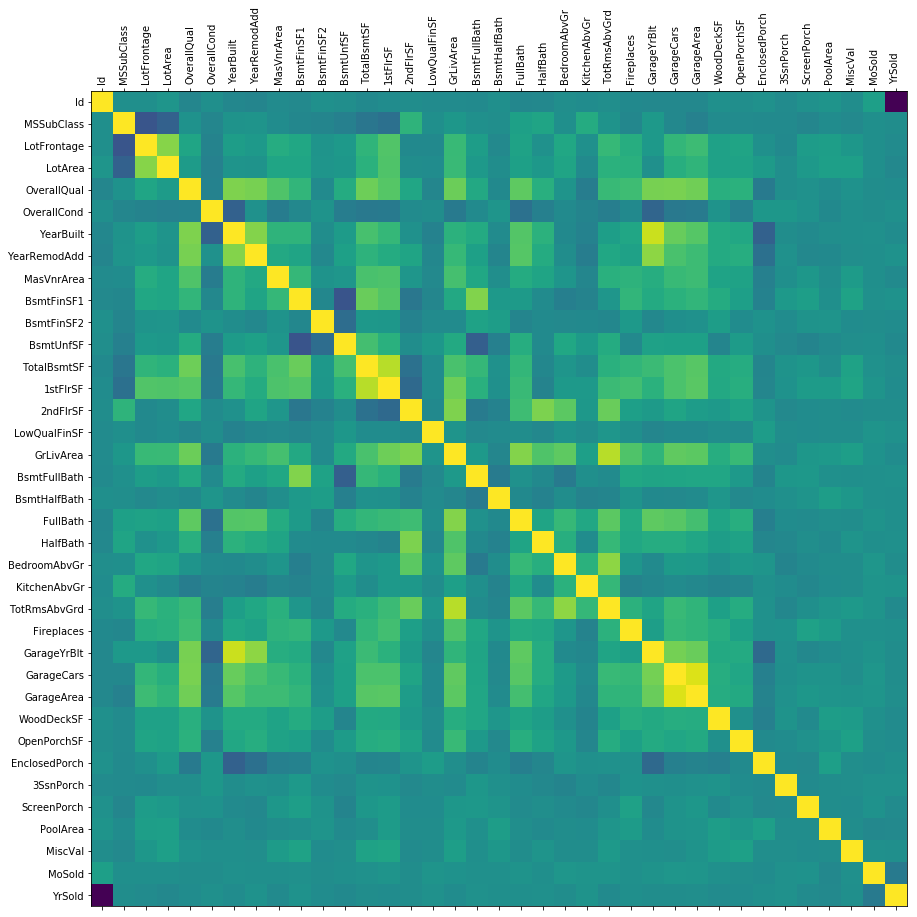

In [102]:
corr = test.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);

In [103]:
test['MSZoning'] = test['MSZoning'].fillna('RL')
test['Alley'] = test['Alley'].fillna('NoAlley')
test['Exterior1st'] = test['Exterior1st'].fillna('VinylSd')
test['Exterior2nd'] = test['Exterior2nd'].fillna('VinylSd')
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['BsmtQual'] = test['BsmtQual'].fillna('NoBasement')
test['BsmtCond'] = test['BsmtCond'].fillna('NoBasement')
test['BsmtExposure'] = test['BsmtExposure'].fillna('NoBasement')
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)
test['KitchenQual'] = test['KitchenQual'].fillna('TA')
test['Functional'] = test['Functional'].fillna('Typ')
test['FireplaceQu'] = test['FireplaceQu'].fillna('NoFireplace')
test['GarageType'] = test['GarageType'].fillna('NoGarage')
test['GarageFinish'] = test['GarageFinish'].fillna('NoGarage')
test['GarageCars'] = test['GarageCars'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0)
test['GarageQual'] = test['GarageQual'].fillna('NoGarage')
test['Fence'] = test['Fence'].fillna('NoFence')
test['MiscFeature'] = test['MiscFeature'].fillna('NoMisc')
test['SaleType'] = test['SaleType'].fillna('WD')

In [104]:
testnas = np.sum(test.isnull())
testnas[testnas > 0]

LotFrontage      227
Utilities          2
BsmtFinType1      42
BsmtFinType2      42
BsmtFinSF2         1
BsmtHalfBath       2
GarageYrBlt       78
GarageCond        78
PoolQC          1456
dtype: int64

In [105]:
dropcols1 = ['Utilities','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtHalfBath','GarageYrBlt','GarageCond','PoolQC']
test = test.drop(columns=dropcols1)

In [106]:
pd.set_option('max_rows',200)
pd.set_option('max_columns',200)

In [107]:
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['HouseAge'] = test['YearBuilt'].max() - test['YearBuilt']

In [108]:
test.TotalSF.max()

10190.0

In [109]:
test.loc[test['TotalSF']>10000,'TotalSF'] = test.loc[test['TotalSF']>10000,'TotalSF']/2 # fixing an outlier

In [110]:
test.TotalSF.max()

5542.0

In [111]:
test['MSSubClass'] = test['MSSubClass'].astype(str)

In [112]:
dropcols2 = ['TotalBsmtSF']
test = test.drop(columns=dropcols2)

# KNN

In [113]:
x_columns = list(test.columns[test.dtypes != 'object']) # numerical columns
x_columns = x_columns[2:] # skipping Id and LotFrontage
y_column = ['LotFrontage']

In [114]:
test_knn_LotFrontage = test[test['LotFrontage'].isna()]
train_knn_LotFrontage = test[-test['LotFrontage'].isna()]

In [115]:
y = train_knn_LotFrontage['LotFrontage']
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(train_knn_LotFrontage, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(985, 73) (985,)
(247, 73) (247,)


In [116]:
from sklearn.neighbors import KNeighborsRegressor
random.seed(0)
knn = KNeighborsRegressor(n_neighbors=14) # 14 is best number of neighbors so far
knn.fit(X_train[x_columns], y_train)
predictions = knn.predict(X_test[x_columns])
predictions.shape

(247,)

In [117]:
actual = y_test
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
mse

206.95364785590345

In [118]:
predictions2 = knn.predict(test_knn_LotFrontage[x_columns])
test.loc[test['LotFrontage'].isna(),'LotFrontage'] = predictions2

# Skew

In [119]:
numeric_feats = test.dtypes[test.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
ScreenPorch,3.784349
LotArea,3.112013
OpenPorchSF,2.685015
MasVnrArea,2.546947


# Numerify

In [120]:
test['ExterQual'] = test['ExterQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])
test['ExterCond'] = test['ExterCond'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])
test['BsmtQual'] = test['BsmtQual'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])
test['BsmtCond'] = test['BsmtCond'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])
test['BsmtExposure'] = test['BsmtExposure'].replace(['NoBasement','No','Mn','Av','Gd'],[0,1,2,3,4])
test["HeatingQC"] = test['HeatingQC'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])
test["CentralAir"] = test['CentralAir'].replace(['N','Y'],[0,1])
test["Electrical"] = test['Electrical'].replace(['FuseP','FuseF','FuseA','Mix','SBrkr'],[0,1,2,3,4])
test["KitchenQual"] = test['KitchenQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])
test["Functional"] = test['Functional'].replace(['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],[0,1,2,3,4,5,6,7])
test["FireplaceQu"] = test['FireplaceQu'].replace(['NoFireplace','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])
test["GarageQual"] = test['GarageQual'].replace(['NoGarage','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])
test["GarageFinish"] = test['GarageFinish'].replace(['NoGarage','Unf','RFn','Fin'],[0,1,2,3])

In [121]:
test['MSZoning'] = test['MSZoning'].replace(['C (all)','RM','RH','RL','FV'],[0,1,1,2,3])
test['LotShape'] = test['LotShape'].replace(['IR1','IR2','IR3','Reg'],[0,0,0,1])
test['LotConfig'] = test['LotConfig'].replace(['Inside','FR2','Corner','CulDSac','FR3'],[0,0,0,1,1])
test['LandSlope'] = test['LandSlope'].replace(['Sev','Mod','Gtl'],[0,0,1])
test['MasVnrType'] = test['MasVnrType'].replace(['None','BrkCmn','BrkFace','Stone'],[0,0,1,2])
test['PavedDrive'] = test['PavedDrive'].replace(['N','P','Y'],[0,1,2])

In [122]:
skewness = skewness[(skewness) > 0.75] #generally 0.75 or 0.8 used as cutoff
print("There are {} skewed numerical features to log transform".format(skewness.shape[0]))
test_normalized = test.copy()
skewed_features = skewness.index
for feat in skewed_features:
      test_normalized[feat] = np.log1p(test_normalized[feat])

There are 34 skewed numerical features to log transform


In [128]:
drop_cols3 = ['Id','ExterCond','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BedroomAbvGr','Fireplaces','3SsnPorch','MiscVal','MoSold','YrSold','YearBuilt']
test_normalized = test_normalized.drop(columns=drop_cols3)

In [129]:
test_normalized.dtypes

MSSubClass        object
MSZoning           int64
LotFrontage      float64
LotArea          float64
Street            object
Alley             object
LotShape           int64
LandContour       object
LotConfig          int64
LandSlope          int64
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual      float64
OverallCond      float64
YearRemodAdd     float64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
Foundation        object
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinSF1       float64
BsmtUnfSF        float64
Heating           object
HeatingQC          int64
CentralAir         int64
Electrical         int64
BsmtFullBath     float64
FullBath         float64
HalfBath         float64
KitchenAbvGr     float64
KitchenQual        int64


In [130]:
test_normalized_dummy = pd.get_dummies(test_normalized,drop_first=True)
test_normalized_dummy.shape

(1459, 175)

In [131]:
test_normalized_dummy.dtypes

MSZoning                   int64
LotFrontage              float64
LotArea                  float64
LotShape                   int64
LotConfig                  int64
LandSlope                  int64
OverallQual              float64
OverallCond              float64
YearRemodAdd             float64
MasVnrType                 int64
MasVnrArea               float64
ExterQual                  int64
BsmtQual                   int64
BsmtCond                   int64
BsmtExposure               int64
BsmtFinSF1               float64
BsmtUnfSF                float64
HeatingQC                  int64
CentralAir                 int64
Electrical                 int64
BsmtFullBath             float64
FullBath                 float64
HalfBath                 float64
KitchenAbvGr             float64
KitchenQual                int64
TotRmsAbvGrd             float64
Functional                 int64
FireplaceQu                int64
GarageFinish               int64
GarageCars               float64
GarageArea

In [125]:
Xt = test_normalized_dummy

In [132]:
Xt['MSSubClass_150'].value_counts()

0    1458
1       1
Name: MSSubClass_150, dtype: int64